# Unsupervised Machine Learning

### This script contains the following

1. Importing Libraries
2. Data Cleaning
3. The Elbow Technique
4. k-means Clustering
5. Descriptive Analysis

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as p

In [2]:
%matplotlib inline

In [3]:
# Creating a path 

path = r'/Users/tsique/Desktop/CareerFoundry - Data Analytics/3 Immersion/Final Project'

In [4]:
# Importing dataframe

us_shoot = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'us_shoot_clean.csv'), index_col = 0)

In [5]:
# Checking dataframe imported properly

us_shoot

,id,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,...,year,month,day,threat_level_2,race_Asian,race_Black,race_Hispanic,race_Native,race_Other,race_White
0,1,2015-01-02,shot,gun,53.0,2.0,Shelton,WA,True,attack,...,2015,1,2,2.0,1,0,0,0,0,0
1,2,2015-01-02,shot,gun,47.0,2.0,Aloha,OR,False,attack,...,2015,1,2,2.0,0,0,0,0,0,1
2,3,2015-01-03,shot and Tasered,unarmed,23.0,2.0,Wichita,KS,False,other,...,2015,1,3,1.0,0,0,1,0,0,0
3,4,2015-01-04,shot,toy weapon,32.0,2.0,San Francisco,CA,True,attack,...,2015,1,4,2.0,0,0,0,0,0,1
4,5,2015-01-04,shot,nail gun,39.0,2.0,Evans,CO,False,attack,...,2015,1,4,2.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7724,7725,2022-09-07,shot,screwdriver,NaN,2.0,Flagstaff,AZ,False,other,...,2022,9,7,1.0,0,0,0,0,0,0
7725,7726,2022-09-07,shot,gun,NaN,2.0,Springville,AL,False,attack,...,2022,9,7,2.0,0,0,0,0,0,1
7726,7727,2022-09-07,shot,knife,61.0,2.0,St. Louis,MO,False,other,...,2022,9,7,1.0,0,1,0,0,0,0
7727,7728,2022-09-07,shot,gun,27.0,2.0,Washington County,TN,False,attack,...,2022,9,7,2.0,0,0,0,0,0,0


## 2. Data Cleaning

In [11]:
# Checking datatype

us_shoot.dtypes

id                           int64
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                     float64
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
year                         int64
month                        int64
day                          int64
threat_level_2             float64
race_Asian                   int64
race_Black                   int64
race_Hispanic                int64
race_Native                  int64
race_Other                   int64
race_White                   int64
dtype: object

In [17]:
# Removing categorical columns 
# For k-means algorithism

df_shoot = us_shoot.drop(columns = ['date', 'manner_of_death', 'armed', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera'])

In [18]:
# Checking new dataframe created

df_shoot

,id,age,gender,year,month,day,threat_level_2,race_Asian,race_Black,race_Hispanic,race_Native,race_Other,race_White
0,1,53.0,2.0,2015,1,2,2.0,1,0,0,0,0,0
1,2,47.0,2.0,2015,1,2,2.0,0,0,0,0,0,1
2,3,23.0,2.0,2015,1,3,1.0,0,0,1,0,0,0
3,4,32.0,2.0,2015,1,4,2.0,0,0,0,0,0,1
4,5,39.0,2.0,2015,1,4,2.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7724,7725,NaN,2.0,2022,9,7,1.0,0,0,0,0,0,0
7725,7726,NaN,2.0,2022,9,7,2.0,0,0,0,0,0,1
7726,7727,61.0,2.0,2022,9,7,1.0,0,1,0,0,0,0
7727,7728,27.0,2.0,2022,9,7,2.0,0,0,0,0,0,0


In [20]:
# Checking for missing values

df_shoot.isnull().sum()

id                  0
age               482
gender             20
year                0
month               0
day                 0
threat_level_2      0
race_Asian          0
race_Black          0
race_Hispanic       0
race_Native         0
race_Other          0
race_White          0
dtype: int64

In [29]:
# Subset for missing values in df_shoot

df_nan = df_shoot [df_shoot['age'].isnull() == True]

In [30]:
df_nan

,id,age,gender,year,month,day,threat_level_2,race_Asian,race_Black,race_Hispanic,race_Native,race_Other,race_White
127,128,NaN,2.0,2015,2,20,2.0,0,0,1,0,0,0
769,770,NaN,2.0,2015,10,12,2.0,0,1,0,0,0,0
809,810,NaN,2.0,2015,10,24,2.0,0,0,0,0,0,0
819,820,NaN,2.0,2015,10,29,1.0,0,1,0,0,0,0
932,933,NaN,2.0,2015,12,10,2.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7715,7716,NaN,2.0,2022,9,3,1.0,0,0,0,0,0,0
7718,7719,NaN,2.0,2022,9,3,0.0,0,0,0,0,0,0
7723,7724,NaN,2.0,2022,9,6,1.0,0,0,0,0,0,0
7724,7725,NaN,2.0,2022,9,7,1.0,0,0,0,0,0,0


In [31]:
# Creating df without missing values 

df_shoot_clean = df_shoot[df_shoot['age'].isnull()== False]

In [32]:
df_shoot_clean.shape

(7247, 13)

In [33]:
# Create a df without gender missing values 

df_nan_gender = df_shoot [df_shoot['gender'].isnull() == True]

In [34]:
df_nan_gender.shape

(20, 13)

In [35]:
# Creating a df without gender missing values

shoot_clean = df_shoot_clean[df_shoot_clean['gender'].isnull() == False]

In [37]:
# Checking shape to ensure missing values were dropped 

shoot_clean.shape

(7241, 13)

In [38]:
shoot_clean.isnull().sum()

id                0
age               0
gender            0
year              0
month             0
day               0
threat_level_2    0
race_Asian        0
race_Black        0
race_Hispanic     0
race_Native       0
race_Other        0
race_White        0
dtype: int64

## 3. The Elbow Technique

In [14]:
# Defining the range of potential clusters in the data.
# Defining k-means clusters in the range assigned above.

num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [39]:
# Creating a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(shoot_clean).score(shoot_clean) for i in range(len(kmeans))] 

score

[-35505885141.335464,
 -8885588505.760876,
 -3995902249.794649,
 -2242820448.675609,
 -1428926997.8382125,
 -1002126115.6319851,
 -736019133.510374,
 -561251889.7372729,
 -444662518.5323393]

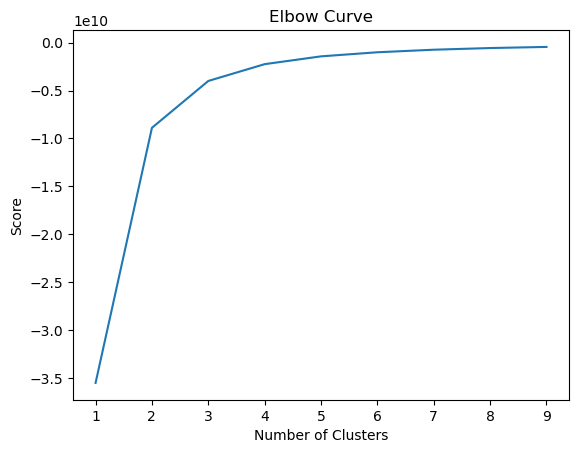

In [41]:
# Plot the elbow curve using PyLab.

plt.plot(num_cl,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### From the elbow curve we can determine that using 3 clusters is the best option.

## 4. k-means Clusterings

In [42]:
# Create the k-means object

kmeans = KMeans(n_clusters = 3)

In [43]:
# Fit the k-means object to the data

kmeans.fit(shoot_clean)

KMeans(n_clusters=3)

In [44]:
# Creating clusters column

shoot_clean['clusters'] = kmeans.fit_predict(shoot_clean)

/var/folders/c8/t34dgzg17f948vl8zbmrjb5w0000gn/T/ipykernel_6188/3260824365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shoot_clean['clusters'] = kmeans.fit_predict(shoot_clean)


In [45]:
# Checking that clusters column was created

shoot_clean

,id,age,gender,year,month,day,threat_level_2,race_Asian,race_Black,race_Hispanic,race_Native,race_Other,race_White,clusters
0,1,53.0,2.0,2015,1,2,2.0,1,0,0,0,0,0,1
1,2,47.0,2.0,2015,1,2,2.0,0,0,0,0,0,1,1
2,3,23.0,2.0,2015,1,3,1.0,0,0,1,0,0,0,1
3,4,32.0,2.0,2015,1,4,2.0,0,0,0,0,0,1,1
4,5,39.0,2.0,2015,1,4,2.0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7721,7722,32.0,2.0,2022,9,5,2.0,0,0,0,0,0,0,0
7722,7723,63.0,2.0,2022,9,5,2.0,0,0,0,0,0,0,0
7726,7727,61.0,2.0,2022,9,7,1.0,0,1,0,0,0,0,0
7727,7728,27.0,2.0,2022,9,7,2.0,0,0,0,0,0,0,0


In [46]:
# Checking number of observations per cluster

shoot_clean['clusters'].value_counts()

1    2491
2    2405
0    2345
Name: clusters, dtype: int64

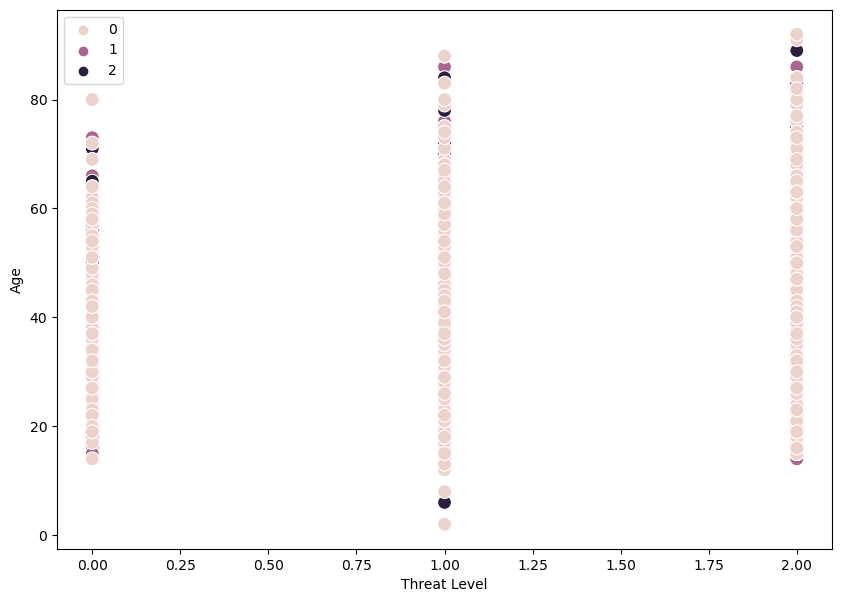

In [50]:
# Plot the clusters for age and threat_level_2

plt.figure(figsize=(10,7))
ax = sns.scatterplot(x = shoot_clean['threat_level_2'], y = shoot_clean['age'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Threat Level')
plt.ylabel('Age')
plt.show()

#### The clusters show us that there are a lot of low level threat levels.

## 5. Descriptive Analysis

In [ ]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [51]:
# Creating new groups based on cluster color 

shoot_clean.loc[shoot_clean['clusters'] == 2, 'cluster'] = 'dark purple'
shoot_clean.loc[shoot_clean['clusters'] == 1, 'cluster'] = 'purple'
shoot_clean.loc[shoot_clean['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/c8/t34dgzg17f948vl8zbmrjb5w0000gn/T/ipykernel_6188/2650330704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shoot_clean.loc[shoot_clean['clusters'] == 2, 'cluster'] = 'dark purple'


In [52]:
# Creating groupby to find the mean and medians

shoot_clean.groupby('cluster').agg({'age':['mean', 'median'], 
                         'threat_level_2':['mean', 'median'], 
                         'gender':['mean', 'median']})

age        threat_level_2           gender       
                  mean median           mean median      mean median
cluster                                                             
dark purple  37.475260   35.0       1.629106    2.0  1.953015    2.0
pink         37.455437   35.0       1.547548    2.0  1.951386    2.0
purple       36.649940   34.0       1.617021    2.0  1.957045    2.0

#### From this aggregation we can see that overall 35-37 year olds are being shot, most of them being men (gender 2 = man), and the threat level is usually done with an attack (2 = attack)